In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('train (3task).csv', encoding='cp1251')
train['train_test']=['train']*len(train['Скважина'].values)
test = pd.read_csv('test_before.csv', encoding='cp1251')
test['train_test']=['test']*len(test['Скважина'].values)
train_test=pd.concat([train,test])

In [3]:
train_test

,Скважина,Дата,Характер работы,Состояние,"Время работы, ч","Нефть, т","Вода, т","Жидкость, т","Попутный газ, м3","Закачка, м3",...,d_nkt,cell_area_m2,completion,pres_base_original,bo,kprod_calc,X,Y,group,train_test
0,e3cb0f19db24ac4e,2015-01-01,НЕФ,Б/Д ТГ,0,0.00,"0,00","0,00",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
1,e3cb0f19db24ac4e,2015-02-01,НЕФ,Б/Д ТГ,0,0.00,"0,00","0,00",0,0,...,57.8000,218606.0,МГРП,183.661,1.11272,0.000000,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
2,e3cb0f19db24ac4e,2015-03-01,НЕФ,Б/Д ТГ,0,0.00,"0,00","0,00",0,0,...,57.8000,221418.0,МГРП,107.000,1.11272,0.000000,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
3,e3cb0f19db24ac4e,2015-04-01,НЕФ,РАБ.,490,590.00,"443,69","1033,69",33630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
4,e3cb0f19db24ac4e,2015-05-01,НЕФ,РАБ.,744,760.58,"541,98","1302,56",43353,0,...,57.8000,21313.1,МГРП,107.000,1.11272,1.126690,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
5,e3cb0f19db24ac4e,2015-06-01,НЕФ,РАБ.,717,542.62,"556,10","1098,72",57847,0,...,57.8000,52652.5,МГРП,107.000,1.11272,1.106280,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
6,e3cb0f19db24ac4e,2015-07-01,НЕФ,РАБ.,741,793.67,"43,82","837,50",45239,0,...,57.8000,78943.7,МГРП,107.000,1.11272,1.146970,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
7,e3cb0f19db24ac4e,2015-08-01,НЕФ,РАБ.,744,772.24,"39,42","811,66",44018,0,...,57.8000,102067.0,МГРП,107.000,1.11272,1.007550,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
8,e3cb0f19db24ac4e,2015-09-01,НЕФ,РАБ.,720,679.50,"200,86","880,36",38732,0,...,57.8000,121726.0,МГРП,245.000,1.13324,0.668123,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
9,e3cb0f19db24ac4e,2015-10-01,НЕФ,РАБ.,744,718.17,"47,32","765,48",81755,0,...,57.5000,170313.0,МГРП,245.000,1.13324,0.503920,-176.055942,267.088631,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train


In [4]:
train_test_ppddate=train_test[['group','Дата перевода в ППД']]
train_test_debit_do=train_test[['Скважина','Дата', 'Нефть, м3', 'Время работы, ч']]
train_test_model=train_test[(train_test['Дата']>='2010-09-01')&(train_test['Состояние']=='РАБ.')&(train_test['Характер работы']=='НЕФ')]
train_test_model=train_test_model[pd.isnull(train_test_model['Дебит нефти'])==False]
train_test_model=train_test_model[['Скважина','Дата','group','Дебит нефти','X','Y','train_test','Нефть, м3', 'Время работы, ч','h_vert', 'pres_atm', 'heff', 'd_nkt','cell_area_m2', 'bo', 'kprod_calc']]

In [5]:
def drop_columns(df, drop_col):
    df=df.drop(drop_col, axis=1, inplace=True)

In [6]:
drop_col=[
       
       'Нефть, т', 'Вода, т', 'Жидкость, т', 
       'Природный газ, м3', 'Газ из газовой шапки, м3', 'Конденсат, т',
       'Простой, ч', 'Причина простоя',  'Тип скважины',
       'Диаметр экспл.колонны', 'Диаметр НКТ', 'Диаметр штуцера',
       'Глубина верхних дыр перфорации', 'Удлинение', 'Способ эксплуатации',
       'Тип насоса', 'Производительность ЭЦН', 'Напор', 'Частота',
       'Коэффициент сепарации', 'Глубина спуска', 'Буферное давление',
       'Давление в линии', 'Пластовое давление', 'Динамическая высота',
       'Затрубное давление', 'Давление на приеме', 'Забойное давление',
       'Дебит нефти', 'Дебит жидкости', 'Обводненность',
       'Состояние на конец месяца', 'Давление наcыщения', 'Газовый фактор',
       'Вязкость нефти в пластовых условиях',
       'Вязкость воды в пластовых условиях',
       'Вязкость жидкости в пласт. условиях', 'объемный коэффициент',
       'Плотность нефти', 'Плотность воды', 'Радиус контура питания',
       'Дата ввода в эксплуатацию', 'Замерное забойное давление',
         'Рпл',  'Р уст.1', 
       'work_character', 
       'completion', 'pres_base_original', ]

In [7]:
drop_columns(train_test, drop_col)

In [8]:
float_cols = ['Обводненность (масса), %','Нефть, м3',
       'Жидкость, м3', 'Добыча растворенного газа, м3',]

In [9]:
for df in [train_test]:
    for col in float_cols:
        df[col] = df[col].apply(lambda s: s.replace(',', '.'))
    df[float_cols] = df[float_cols].astype(np.float64)

In [10]:
train_test.columns

Index(['Скважина', 'Дата', 'Характер работы', 'Состояние', 'Время работы, ч',
       'Попутный газ, м3', 'Закачка, м3', 'Обводненность (масса), %',
       'Агент закачки', 'Нефть, м3', 'Жидкость, м3',
       'Добыча растворенного газа, м3', 'Дата перевода в ППД', 'Н вд', 'Н нд',
       'Удл', 'D э/к', 'D нкт', 'Н сп', 'Приемистость', 'Р пл',
       'Р заб расчётное', 'Потери давления на трение', 'Р затр', 'Р уст',
       'Закачка за месяц', 'k', 'Р заб', 'h_vert', 'pres_atm', 'heff', 'd_nkt',
       'cell_area_m2', 'bo', 'kprod_calc', 'X', 'Y', 'group', 'train_test'],
      dtype='object')

In [11]:
nag_train_test=train_test[(train_test['Дата']>='2010-09-01')&(train_test['Состояние']=='РАБ.')&(train_test['Характер работы']=='НАГ')]

In [12]:
nag_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3507 entries, 77 to 4155
Data columns (total 39 columns):
Скважина                         3507 non-null object
Дата                             3507 non-null object
Характер работы                  3507 non-null object
Состояние                        3507 non-null object
Время работы, ч                  3507 non-null int64
Попутный газ, м3                 3507 non-null int64
Закачка, м3                      3507 non-null int64
Обводненность (масса), %         3507 non-null float64
Агент закачки                    3501 non-null object
Нефть, м3                        3507 non-null float64
Жидкость, м3                     3507 non-null float64
Добыча растворенного газа, м3    3507 non-null float64
Дата перевода в ППД              2094 non-null object
Н вд                             2094 non-null float64
Н нд                             2094 non-null float64
Удл                              2094 non-null float64
D э/к                   

In [13]:
dob_train_test=train_test[(train_test['Дата']>='2015-09-01')&(train_test['Состояние']=='РАБ.')&(train_test['Характер работы']=='НЕФ')]

In [14]:
def drop_columns_dob(df, drop_col):
    df=df.drop(drop_col, axis=1, inplace=True)

In [15]:
drop_col_dob=['Дата перевода в ППД', 'Н вд', 'Н нд',
       'Удл', 'D э/к', 'D нкт', 'Н сп', 'Приемистость', 'Р пл',
       'Р заб расчётное', 'Потери давления на трение', 'Р затр', 'Р уст',
       'Закачка за месяц', 'k', 'Р заб','Агент закачки',]

In [16]:
drop_columns_dob(dob_train_test, drop_col_dob)

C:\Users\volko\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
dob_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 8 to 4149
Data columns (total 22 columns):
Скважина                         2589 non-null object
Дата                             2589 non-null object
Характер работы                  2589 non-null object
Состояние                        2589 non-null object
Время работы, ч                  2589 non-null int64
Попутный газ, м3                 2589 non-null int64
Закачка, м3                      2589 non-null int64
Обводненность (масса), %         2589 non-null float64
Нефть, м3                        2589 non-null float64
Жидкость, м3                     2589 non-null float64
Добыча растворенного газа, м3    2589 non-null float64
h_vert                           2473 non-null float64
pres_atm                         2473 non-null float64
heff                             2473 non-null float64
d_nkt                            2473 non-null float64
cell_area_m2                     2473 non-null float64
bo                     

In [18]:
nag_train_test[pd.isnull(nag_train_test['Н вд'])==True]

,Скважина,Дата,Характер работы,Состояние,"Время работы, ч","Попутный газ, м3","Закачка, м3","Обводненность (масса), %",Агент закачки,"Нефть, м3",...,pres_atm,heff,d_nkt,cell_area_m2,bo,kprod_calc,X,Y,group,train_test
77,2856e519c47b76c6,2012-12-01,НАГ,РАБ.,670,0,5751,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
78,2856e519c47b76c6,2013-01-01,НАГ,РАБ.,744,0,5052,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,21.29,62.0,57127.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
79,2856e519c47b76c6,2013-02-01,НАГ,РАБ.,672,0,4764,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,120982.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
80,2856e519c47b76c6,2013-03-01,НАГ,РАБ.,744,0,5615,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,168867.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
82,2856e519c47b76c6,2013-05-01,НАГ,РАБ.,744,0,6096,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,180932.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
83,2856e519c47b76c6,2013-06-01,НАГ,РАБ.,720,0,4710,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,180970.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
87,2856e519c47b76c6,2013-10-01,НАГ,РАБ.,744,0,5332,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,183844.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
88,2856e519c47b76c6,2013-11-01,НАГ,РАБ.,720,0,4854,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,183105.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
89,2856e519c47b76c6,2013-12-01,НАГ,РАБ.,744,0,4690,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,182584.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train
91,2856e519c47b76c6,2014-02-01,НАГ,РАБ.,672,0,3849,0.0,"Вода пресная+подтоварная,м.куб.",0.0,...,203.0000,23.90,62.0,188151.0,1.15646,0.0,21.367925,-6.196599,0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a61...,train


#предлагаю удалять пропущенные значения, тк заменять средними не очень верно, тк средние значения могут быть разными от группы к группе, после кластерного анализа можно будет заменить средними в рамках одного кластера

обработаем категориальный признак 'агент закачки'

In [19]:
nag_train_test['Агент закачки'].value_counts()

Вода пресная+подтоварная,м.куб.                                 2774
Вода подтоварная,м.куб.                                          388
Вода сеноманская+подтоварная, м.куб                              282
в/пр.                                                             30
Вода сеноманская                                                  18
Вода пресная+подтоварная,м.куб., Вода подтоварная,м.куб.           4
Вода сеноманская+подтоварная, м.куб, Вода подтоварная,м.куб.       3
Вода сеноманская, Вода подтоварная,м.куб., в/пр.                   1
в/пр., Вода сеноманская+подтоварная, м.куб                         1
Name: Агент закачки, dtype: int64

In [20]:
def nag_agent(db_train_test, col):
    agent=[]
    for i in db_train_test[col]:
        if i=='Вода подтоварная,м.куб.':
            agent.append('Вода подтоварная,м.куб.')
        else:
            if i=='Вода пресная+подтоварная,м.куб.':
                agent.append('Вода пресная+подтоварная,м.куб.')
            else:
                agent.append('другое')
    db_train_test[col+' cat']=agent
    return db_train_test

In [21]:
nag_train_test=nag_agent(nag_train_test,'Агент закачки')
nag_train_test=nag_train_test.drop('Агент закачки', axis=1)

C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
def get_one_hot(db_train_test, col):
    dummies = pd.get_dummies(db_train_test[col], prefix=col, drop_first=False)
    db_train_test = pd.concat([db_train_test, dummies], axis=1)    
    return db_train_test

In [23]:
nag_train_test=get_one_hot(nag_train_test, 'Агент закачки cat')
nag_train_test=nag_train_test.drop('Агент закачки cat', axis=1)

In [24]:
nag_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3507 entries, 77 to 4155
Data columns (total 41 columns):
Скважина                                             3507 non-null object
Дата                                                 3507 non-null object
Характер работы                                      3507 non-null object
Состояние                                            3507 non-null object
Время работы, ч                                      3507 non-null int64
Попутный газ, м3                                     3507 non-null int64
Закачка, м3                                          3507 non-null int64
Обводненность (масса), %                             3507 non-null float64
Нефть, м3                                            3507 non-null float64
Жидкость, м3                                         3507 non-null float64
Добыча растворенного газа, м3                        3507 non-null float64
Дата перевода в ППД                                  2094 non-null object
Н в

In [25]:
cluster_columns=nag_train_test.columns.tolist()[12:34]
cluster_columns.append('Скважина')
cluster_columns.append('train_test')
X=nag_train_test[cluster_columns]
X2=X[X['train_test']=='test']
X=X[X['train_test']=='train']
X=X.groupby(['Скважина']).mean().reset_index()
X2=X2.groupby(['Скважина']).mean().reset_index()
X=X.dropna()
X2=X2.dropna()
X1=X.drop(['Скважина','Закачка за месяц'], axis=1)
X3=X2.drop(['Скважина','Закачка за месяц'], axis=1)

In [26]:
import matplotlib.pyplot as plt
cluster_range = range( 1, 8 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X1 )
    cluster_errors.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

<Figure size 1200x600 with 1 Axes>

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X1)
predictions=kmeans.predict(X3)
X2['groups']=predictions
X2['train_test']=['test']*X2.shape[0]
X['groups']=kmeans.labels_
X['train_test']=['train']*X.shape[0]
nagn_clusters=pd.concat([X,X2])

In [28]:
dob_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 8 to 4149
Data columns (total 22 columns):
Скважина                         2589 non-null object
Дата                             2589 non-null object
Характер работы                  2589 non-null object
Состояние                        2589 non-null object
Время работы, ч                  2589 non-null int64
Попутный газ, м3                 2589 non-null int64
Закачка, м3                      2589 non-null int64
Обводненность (масса), %         2589 non-null float64
Нефть, м3                        2589 non-null float64
Жидкость, м3                     2589 non-null float64
Добыча растворенного газа, м3    2589 non-null float64
h_vert                           2473 non-null float64
pres_atm                         2473 non-null float64
heff                             2473 non-null float64
d_nkt                            2473 non-null float64
cell_area_m2                     2473 non-null float64
bo                     

In [29]:
cluster_columns_dob=dob_train_test.columns.tolist()[4:18]
cluster_columns_dob.append('Скважина')
cluster_columns_dob.append('train_test')
X_dob=dob_train_test[cluster_columns_dob]
X_dob_train=X_dob[X_dob['train_test']=='train']
X_dob_test=X_dob[X_dob['train_test']=='test']
X_dob_train=X_dob_train.groupby(['Скважина']).mean().reset_index()
X_dob_test=X_dob_test.groupby(['Скважина']).mean().reset_index()
X_dob_train=X_dob_train.dropna()
X_dob_test=X_dob_test.dropna()
X_dob_train1=X_dob_train.drop(['Скважина','Закачка, м3'], axis=1)
X_dob_test1=X_dob_test.drop(['Скважина','Закачка, м3'], axis=1)

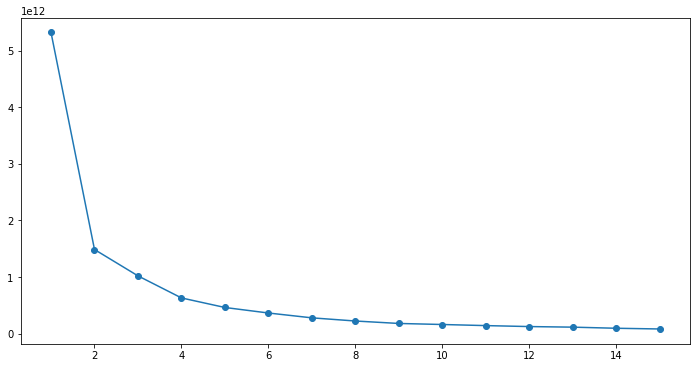

In [30]:
cluster_range_dob = range( 1, 16 )
cluster_errors_dob = []

for num_clusters in cluster_range_dob:
    clusters = KMeans( num_clusters )
    clusters.fit( X_dob_train1 )
    cluster_errors_dob.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range_dob, "cluster_errors": cluster_errors_dob } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [31]:
kmeans_dob = KMeans(n_clusters=6, random_state=0).fit(X_dob_train1)
dob_groups=kmeans_dob.labels_
X_dob_train['dob_groups']=dob_groups
X_dob_train['train_test']=['train']*X_dob_train.shape[0]
predictions_dob=kmeans_dob.predict(X_dob_test1)
X_dob_test['dob_groups']=predictions_dob
X_dob_test['train_test']=['test']*X_dob_test.shape[0]
dob_clusters=pd.concat([X_dob_train, X_dob_test])

In [32]:
dob_clusters

,Скважина,"Время работы, ч","Попутный газ, м3","Закачка, м3","Обводненность (масса), %","Нефть, м3","Жидкость, м3","Добыча растворенного газа, м3",h_vert,pres_atm,heff,d_nkt,cell_area_m2,bo,kprod_calc,dob_groups,train_test
0,0298eb8f29815008,696.117647,229144.588235,0.0,4.782353,1949.828235,2028.328824,229144.588235,3134.77,310.690994,4.73,58.968750,2.466175e+05,1.194968,0.512323,5,train
1,065e87269206c3a5,723.178571,18836.071429,0.0,12.650000,222.956786,250.835714,18836.086071,2604.58,133.627561,5.38,58.135714,2.076462e+05,1.121283,0.148270,1,train
3,070f01729b63dc57,649.400000,17919.733333,0.0,12.900000,214.873333,249.392000,17919.722667,2722.81,258.183786,8.38,57.000000,1.080623e+05,1.184040,0.099025,1,train
4,111aca1cc0c8e174,690.500000,46136.125000,0.0,63.512500,554.192500,1401.047500,46136.077500,2737.81,254.051200,4.73,58.500000,1.902853e+05,1.184040,0.346049,1,train
5,16532def14279ef6,726.535714,18193.142857,0.0,19.189286,216.788214,260.943571,18193.031429,2598.15,136.404736,9.80,57.467857,3.078210e+05,1.122710,0.146615,4,train
6,16c531da640bdb7c,718.666667,62548.833333,0.0,31.366667,796.280000,1056.233333,62548.863333,2670.80,306.241180,4.73,58.600000,8.685226e+04,1.214852,0.135103,5,train
7,17bfa9f21b1a4852,726.321429,2397.750000,0.0,10.753571,28.347857,31.342143,2397.782857,2604.34,159.950079,3.99,62.000000,1.795664e+05,1.131736,0.014164,1,train
8,183a39574b219d93,702.538462,27996.038462,0.0,19.930769,241.901154,293.169231,27996.038462,3099.75,305.232415,4.73,61.011538,1.295203e+06,1.188160,0.056590,3,train
9,191fec5c0ddeb266,728.296296,5448.370370,0.0,71.055556,65.342222,206.689630,5448.375556,2698.69,237.206581,12.80,57.655556,1.743898e+05,1.171178,0.044048,1,train
10,1ad56e758277186f,652.714286,122903.285714,0.0,41.842857,1548.441429,2545.518571,122903.378571,2569.85,319.060433,4.73,58.600000,1.370572e+05,1.218510,1.012882,5,train


In [33]:
dob_train_test=dob_train_test.merge(dob_clusters, on=['Скважина','train_test'], how='left')

In [34]:
nag_train_test=nag_train_test.merge(nagn_clusters, on=['Скважина','train_test'], how='left')

In [35]:
nag_train_test=nag_train_test[['Скважина','train_test', 'Дата', 'Закачка, м3','groups','group','Агент закачки cat_Вода подтоварная,м.куб.','Агент закачки cat_Вода пресная+подтоварная,м.куб.','Агент закачки cat_другое','X','Y']]

In [36]:
nag_train_test_pt=pd.pivot_table(nag_train_test, values='Закачка, м3', index=['group','Дата','train_test'],columns=['groups','Агент закачки cat_Вода подтоварная,м.куб.','Агент закачки cat_Вода пресная+подтоварная,м.куб.','Агент закачки cat_другое'], aggfunc=np.sum)

In [37]:
nag_train_test_pt1=pd.pivot_table(nag_train_test, values=['X','Y'], index=['group','Дата','train_test'],columns=['groups'], aggfunc=np.mean)

In [38]:
nag_train_test_pt=nag_train_test_pt.merge(nag_train_test_pt1, on=['group','Дата','train_test'], how='left')

C:\Users\volko\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (4 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [39]:
nag_train_test_pt=nag_train_test_pt.fillna(0)

In [40]:
nag_train_test_pt

(0.0, 0, 0, 1)  \
group                                              Дата       train_test                   
0051cd92cdc80db1da201362fd8c3355c08eb3a3f76a614... 2012-12-01 train                  0.0   
                                                   2013-01-01 train                  0.0   
                                                   2013-02-01 train                  0.0   
                                                   2013-03-01 train                  0.0   
                                                   2013-04-01 train                  0.0   
                                                   2013-05-01 train                  0.0   
                                                   2013-06-01 train                  0.0   
                                                   2013-07-01 train                  0.0   
                                                   2013-08-01 train                  0.0   
                                                   2013-09-01 train                  0.0   
                                                   2013-10-01 train                  0.0   
                                                   2013-11-01 train                  0.0   
                                                   2013-12-01 train                  0.0   
                                                   2014-01-01 train                  0.0   
                                                   2014-02-01 train                  0.0   
                                                   2014-03-01 train                  0.0   
                                                   2014-04-01 train                  0.0   
                                                   2014-05-01 train                  0.0   
                                                   2014-06-01 train                  0.0   
                                                   2014-07-01 train                  0.0   
                                                   2014-08-01 train                  0.0   
                                                   2014-09-01 train                  0.0   
                                                   2014-10-01 train                  0.0   
                                                   2014-11-01 train                  0.0   
                                                   2015-04-01 train                  0.0   
                                                   2015-05-01 train                  0.0   
                                                   2015-06-01 train                  0.0   
                                                   2015-07-01 train                  0.0   
                                                   2015-08-01 train                  0.0   
                                                   2015-09-01 train                  0.0   
...                                                                                  ...   
ff5766c9c42d90c2099384dfe2dfa611f3a669e6ad82253... 2015-05-01 train               2886.0   
                                                   2015-06-01 train               2495.0   
                                                   2015-07-01 train               2597.0   
                                                   2015-08-01 train               2146.0   
                                                   2015-09-01 train               2414.0   
                                                   2015-10-01 train               2162.0   
                                                   2015-11-01 train               2114.0   
                                                   2015-12-01 train               2102.0   
                                                   2016-01-01 train               2046.0   
                                                   2016-02-01 train               1923.0   
                                                   2016-03-01 train               1471.0   
                          

In [41]:
dob_train_test.columns

Index(['Скважина', 'Дата', 'Характер работы', 'Состояние', 'Время работы, ч_x',
       'Попутный газ, м3_x', 'Закачка, м3_x', 'Обводненность (масса), %_x',
       'Нефть, м3_x', 'Жидкость, м3_x', 'Добыча растворенного газа, м3_x',
       'h_vert_x', 'pres_atm_x', 'heff_x', 'd_nkt_x', 'cell_area_m2_x', 'bo_x',
       'kprod_calc_x', 'X', 'Y', 'group', 'train_test', 'Время работы, ч_y',
       'Попутный газ, м3_y', 'Закачка, м3_y', 'Обводненность (масса), %_y',
       'Нефть, м3_y', 'Жидкость, м3_y', 'Добыча растворенного газа, м3_y',
       'h_vert_y', 'pres_atm_y', 'heff_y', 'd_nkt_y', 'cell_area_m2_y', 'bo_y',
       'kprod_calc_y', 'dob_groups'],
      dtype='object')

In [42]:
dob_train_test=dob_train_test[['Дата','group','dob_groups','Нефть, м3_x','Время работы, ч_x','X','Y','train_test']]
#dob_train_test['нефть-время']=dob_train_test['Нефть, м3_x']/dob_train_test['Время работы, ч_x']
#dob_train_test=dob_train_test.drop(['Нефть, м3_x','Время работы, ч_x'],axis=1)
dob_train_test_pt=pd.pivot_table(dob_train_test, values='Нефть, м3_x', index=['group','Дата','train_test'],columns=['dob_groups'], aggfunc=lambda x: len(x.unique()))
dob_train_test_pt1=pd.pivot_table(dob_train_test, values=['X','Y'], index=['group','Дата','train_test'],columns=['dob_groups'], aggfunc=np.mean)
dob_train_test_pt=dob_train_test_pt.merge(dob_train_test_pt1, on=['group','Дата','train_test'], how='left')
dob_train_test_pt=dob_train_test_pt.fillna(0)

C:\Users\volko\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [43]:
train_test_model=train_test_model.merge(nag_train_test_pt,on=['group','Дата','train_test'], how='left')
train_test_model=train_test_model.merge(dob_train_test_pt,on=['group','Дата','train_test'], how='left')

In [44]:
train_test_model.columns

Index([       'Скважина',            'Дата',           'group',
           'Дебит нефти',               'X',               'Y',
            'train_test',       'Нефть, м3', 'Время работы, ч',
                'h_vert',        'pres_atm',            'heff',
                 'd_nkt',    'cell_area_m2',              'bo',
            'kprod_calc',    (0.0, 0, 0, 1),    (0.0, 0, 1, 0),
          (0.0, 1, 0, 0),    (1.0, 0, 0, 1),    (1.0, 0, 1, 0),
          (1.0, 1, 0, 0),    '('X', 0.0)_x',    '('X', 1.0)_x',
          '('Y', 0.0)_x',    '('Y', 1.0)_x',               0.0,
                     1.0,               2.0,               3.0,
                     4.0,               5.0,    '('X', 0.0)_y',
          '('X', 1.0)_y',        ('X', 2.0),        ('X', 3.0),
              ('X', 4.0),        ('X', 5.0),    '('Y', 0.0)_y',
          '('Y', 1.0)_y',        ('Y', 2.0),        ('Y', 3.0),
              ('Y', 4.0),        ('Y', 5.0)],
      dtype='object')

In [45]:
train_test_model['dis_nagn_0gr']=((train_test_model.iloc[:,-22]-train_test_model['X'])**2+(train_test_model.iloc[:,-20]-train_test_model['Y'])**2)**0.5
train_test_model['dis_nagn_1gr']=((train_test_model.iloc[:,-21]-train_test_model['X'])**2+(train_test_model.iloc[:,-19]-train_test_model['Y'])**2)**0.5
train_test_model['dis_dob_0gr_0nag']=((train_test_model.iloc[:,-12]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-6]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_0gr_1nag']=((train_test_model.iloc[:,-12]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-6]-train_test_model.iloc[:,-19])**2)**0.5
train_test_model['dis_dob_1gr_0nag']=((train_test_model.iloc[:,-11]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-5]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_1gr_1nag']=((train_test_model.iloc[:,-11]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-5]-train_test_model.iloc[:,-19])**2)**0.5
train_test_model['dis_dob_2gr_0nag']=((train_test_model.iloc[:,-10]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-4]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_2gr_1nag']=((train_test_model.iloc[:,-10]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-4]-train_test_model.iloc[:,-19])**2)**0.5
train_test_model['dis_dob_3gr_0nag']=((train_test_model.iloc[:,-9]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-3]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_3gr_1nag']=((train_test_model.iloc[:,-9]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-3]-train_test_model.iloc[:,-19])**2)**0.5
train_test_model['dis_dob_4gr_0nag']=((train_test_model.iloc[:,-8]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-2]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_4gr_1nag']=((train_test_model.iloc[:,-8]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-2]-train_test_model.iloc[:,-19])**2)**0.5
train_test_model['dis_dob_5gr_0nag']=((train_test_model.iloc[:,-7]-train_test_model.iloc[:,-22])**2+(train_test_model.iloc[:,-1]-train_test_model.iloc[:,-20])**2)**0.5
train_test_model['dis_dob_5gr_1nag']=((train_test_model.iloc[:,-7]-train_test_model.iloc[:,-21])**2+(train_test_model.iloc[:,-1]-train_test_model.iloc[:,-19])**2)**0.5

In [46]:
train_test_model['0gr/dis_nagn_0gr_1']=train_test_model.iloc[:,-28]/train_test_model['dis_nagn_0gr']
train_test_model['0gr/dis_nagn_0gr_2']=train_test_model.iloc[:,-27]/train_test_model['dis_nagn_0gr']
train_test_model['0gr/dis_nagn_0gr_3']=train_test_model.iloc[:,-26]/train_test_model['dis_nagn_0gr']
train_test_model['1gr/dis_nagn_1gr_1']=train_test_model.iloc[:,-25]/train_test_model['dis_nagn_1gr']
train_test_model['1gr/dis_nagn_1gr_2']=train_test_model.iloc[:,-24]/train_test_model['dis_nagn_1gr']
train_test_model['1gr/dis_nagn_1gr_3']=train_test_model.iloc[:,-23]/train_test_model['dis_nagn_1gr']
train_test_model['0gr/dis_dob_0gr_0nag']=train_test_model.iloc[:,-18]/train_test_model['dis_dob_0gr_0nag']
train_test_model['0gr/dis_dob_0gr_1nag']=train_test_model.iloc[:,-18]/train_test_model['dis_dob_0gr_1nag']
train_test_model['1gr/dis_dob_1gr_0nag']=train_test_model.iloc[:,-17]/train_test_model['dis_dob_1gr_0nag']
train_test_model['1gr/dis_dob_1gr_1nag']=train_test_model.iloc[:,-17]/train_test_model['dis_dob_1gr_1nag']
train_test_model['2gr/dis_dob_2gr_0nag']=train_test_model.iloc[:,-16]/train_test_model['dis_dob_2gr_0nag']
train_test_model['2gr/dis_dob_2gr_1nag']=train_test_model.iloc[:,-16]/train_test_model['dis_dob_2gr_1nag']
train_test_model['3gr/dis_dob_3gr_0nag']=train_test_model.iloc[:,-15]/train_test_model['dis_dob_3gr_0nag']
train_test_model['3gr/dis_dob_3gr_1nag']=train_test_model.iloc[:,-15]/train_test_model['dis_dob_3gr_1nag']
train_test_model['4gr/dis_dob_4gr_0nag']=train_test_model.iloc[:,-14]/train_test_model['dis_dob_4gr_0nag']
train_test_model['4gr/dis_dob_4gr_1nag']=train_test_model.iloc[:,-14]/train_test_model['dis_dob_4gr_1nag']
train_test_model['5gr/dis_dob_5gr_0nag']=train_test_model.iloc[:,-13]/train_test_model['dis_dob_5gr_0nag']
train_test_model['5gr/dis_dob_5gr_1nag']=train_test_model.iloc[:,-13]/train_test_model['dis_dob_5gr_1nag']

In [47]:
train_test_model_final=train_test_model[['Скважина','Дата','group','Дебит нефти', 'train_test','Нефть, м3', 'Время работы, ч','h_vert','pres_atm', 'heff','d_nkt', 'cell_area_m2', 'bo','kprod_calc','0gr/dis_nagn_0gr_1','0gr/dis_nagn_0gr_2','0gr/dis_nagn_0gr_3','1gr/dis_nagn_1gr_1','1gr/dis_nagn_1gr_2','1gr/dis_nagn_1gr_3','0gr/dis_dob_0gr_0nag','0gr/dis_dob_0gr_1nag','1gr/dis_dob_1gr_0nag','1gr/dis_dob_1gr_1nag','2gr/dis_dob_2gr_0nag','2gr/dis_dob_2gr_1nag','3gr/dis_dob_3gr_0nag','3gr/dis_dob_3gr_1nag','4gr/dis_dob_4gr_0nag','4gr/dis_dob_4gr_1nag','5gr/dis_dob_5gr_0nag','5gr/dis_dob_5gr_1nag']]

In [48]:
train_test_model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 0 to 3892
Data columns (total 32 columns):
Скважина                3893 non-null object
Дата                    3893 non-null object
group                   3893 non-null object
Дебит нефти             3893 non-null float64
train_test              3893 non-null object
Нефть, м3               3893 non-null object
Время работы, ч         3893 non-null int64
h_vert                  3803 non-null float64
pres_atm                3803 non-null float64
heff                    3803 non-null float64
d_nkt                   3803 non-null float64
cell_area_m2            3803 non-null float64
bo                      3803 non-null float64
kprod_calc              3803 non-null float64
0gr/dis_nagn_0gr_1      1210 non-null float64
0gr/dis_nagn_0gr_2      1210 non-null float64
0gr/dis_nagn_0gr_3      1210 non-null float64
1gr/dis_nagn_1gr_1      1210 non-null float64
1gr/dis_nagn_1gr_2      1210 non-null float64
1gr/dis_nagn_1gr_3      12

In [49]:
train_test_model_final=train_test_model_final.fillna(0)

In [50]:
train_test_model_final

,Скважина,Дата,group,Дебит нефти,train_test,"Нефть, м3","Время работы, ч",h_vert,pres_atm,heff,...,1gr/dis_dob_1gr_0nag,1gr/dis_dob_1gr_1nag,2gr/dis_dob_2gr_0nag,2gr/dis_dob_2gr_1nag,3gr/dis_dob_3gr_0nag,3gr/dis_dob_3gr_1nag,4gr/dis_dob_4gr_0nag,4gr/dis_dob_4gr_1nag,5gr/dis_dob_5gr_0nag,5gr/dis_dob_5gr_1nag
0,bb3cad83fefe2ce0,2013-04-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,2.442960,train,"66,00",720,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,bb3cad83fefe2ce0,2013-07-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,2.474280,train,"52,00",571,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,bb3cad83fefe2ce0,2013-08-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,2.181960,train,"60,00",741,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,bb3cad83fefe2ce0,2013-09-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,1.920960,train,"54,00",682,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,bb3cad83fefe2ce0,2013-10-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,2.161080,train,"48,00",689,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,bb3cad83fefe2ce0,2013-11-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,0.420732,train,"13,00",720,2652.65,147.6223,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,bb3cad83fefe2ce0,2013-12-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,0.448224,train,"17,00",744,2652.65,148.4198,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,bb3cad83fefe2ce0,2014-01-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,0.661200,train,"13,00",744,2652.65,149.3313,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,bb3cad83fefe2ce0,2014-03-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,0.337560,train,"14,00",703,2652.65,152.2044,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,bb3cad83fefe2ce0,2014-04-01,009cdeeb2843a79d524b70ff2676c6b528980674d7294a...,0.430128,train,"15,00",720,2652.65,154.4712,17.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [51]:
train_test_ppddate=train_test_ppddate[pd.isnull(train_test_ppddate['Дата перевода в ППД'])==False]

In [52]:
train_test_model_final=train_test_model_final.merge(train_test_ppddate, on='group', how='left')

In [53]:
train_test_model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263140 entries, 0 to 263139
Data columns (total 33 columns):
Скважина                263140 non-null object
Дата                    263140 non-null object
group                   263140 non-null object
Дебит нефти             263140 non-null float64
train_test              263140 non-null object
Нефть, м3               263140 non-null object
Время работы, ч         263140 non-null int64
h_vert                  263140 non-null float64
pres_atm                263140 non-null float64
heff                    263140 non-null float64
d_nkt                   263140 non-null float64
cell_area_m2            263140 non-null float64
bo                      263140 non-null float64
kprod_calc              263140 non-null float64
0gr/dis_nagn_0gr_1      263140 non-null float64
0gr/dis_nagn_0gr_2      263140 non-null float64
0gr/dis_nagn_0gr_3      263140 non-null float64
1gr/dis_nagn_1gr_1      263140 non-null float64
1gr/dis_nagn_1gr_2      263140 n

In [55]:
from datetime import datetime
res=[]
for i in train_test_model_final['Дата']:
    a=datetime.strptime(i, '%Y-%m-%d')
    res.append(a)
train_test_model_final['date_format']=res

In [ ]:
res=[]
for i in train_test_model_final['Дата перевода в ППД']:
    seconds=(int(i[0:5])-25569)*86400
    a=datetime.utcfromtimestamp(seconds)
    res.append(a)
train_test_model_final['date_format_ppd']=res

In [ ]:
train_test_model_final['days_from_pdd']=train_test_model_final['date_format']-train_test_model_final['date_format_ppd']

In [ ]:
debit_do_date=[]
for i in train_test_model_final['date_format_ppd']:
    if i.day=1:
        if i.month<10:
            a=str(i.year)+'/0'+str(i.month-1)+'/01'
        else:
            a=str(i.year)+'/'+str(i.month-1)+'/01'
    if i.day=0:
        if i.month<10:
            a=str(i.year)+'/0'+str(i.month)+'/01'
        else:
            a=str(i.year)+'/'+str(i.month)+'/01'        
        debit_do_date.append(a)
train_test_model_final['debit_before_date']=debit_do_date

In [ ]:
train_test_model_final=train_test_model_final.merge(train_test_debit_do, left_on=['Скважина','debit_before_date'], right_on=['Скважина','Дата'], how='left')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
train_test_model_final['oil']=[x.replace(',','.') for x in data['Нефть, м3']]
train_test_model_final['oil_old']=[x.replace(',','.') for x in data['Нефть, м3_x']]
train_test_model_final['for_debit_do_fit']=train_test_model_final['oil']/train_test_model_final['Время работы, ч']
train_test_model_final['for_debit_do_predict']=train_test_model_final['oil_old']/train_test_model_final['Время работы, ч_x']

In [ ]:
X=train_test_model_final['for_debit_do_fit']
X1=train_test_model_final['for_debit_do_predict']
Y=train_test_model_final['Дебит нефти']
f=model.fit(X, Y)
f.score
train_test_model_final['debit_do']=f.predict(X1, Y)

In [ ]:
остается решить вопрос с датой ппд, удалить все даты, кроме дней со дня внедрения ппд и сделать модель